<a href="https://colab.research.google.com/github/DanielPerezGuzman22/Machine-Learning/blob/main/Decision_Tees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desicion Trees

# Objetivos

*   Investigar Dataset Titanic
*   Describir el Dataset
*   Cargar y mostrar parte del contenido (head/sample)
*   Dividir Datos (Train/Test)
*   Entrenar modelo
*   Performance ACC
*   F1_score
*   Visualizar arbol
*   Predecir (test al azar).


 Importar las bibliotecas necesarias.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Investigar Dataset Titanic
El conjunto de datos cargado conocido como Titanic, es un conjunto de datos muy conocido en el campo de la ciencia de datos y el aprendizaje automático. Proporciona información sobre los pasajeros a bordo del famoso barco Titanic, incluyendo si sobrevivieron o no. Comúnmente es utilizado para tareas de clasificación, como predecir si un pasajero sobrevivió en función de sus características personales y de viaje.


# Describir el Dataset

Este dataset se encuentra compuesto por 12 colmnas de datos

1. **PassengerId**: Un número de identificación único para cada pasajero.
2. **Survived**: Esta columna indica si el pasajero sobrevivió (1) o no (0) al hundimiento del Titanic.
3. **Pclass**: La clase en la que viajaba el pasajero (1, 2 o 3, donde 1 es la clase más alta).
4. **Name**: El nombre del pasajero.
5. **Sex**: El género del pasajero (masculino o femenino).
6. **Age**: La edad del pasajero.
7. **SibSp**: El número de hermanos o cónyuges a bordo.
8. **Parch**: El número de padres o hijos a bordo.
9. **Ticket**: El número del boleto.
10. **Fare**: El precio del boleto.
11. **Cabin**: El número de cabina del pasajero.
12. **Embarked**: El puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton).



# Cargar y mostrar parte del contenido (head/sample)

In [21]:
# Load the example mpg dataset
titanic= pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Mostrar la matriz completa de datos
#pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
#pd.set_option('display.max_rows', 50)  # Mostrar todas las filas
#print(titanic)

titanic.head(8)
#titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


# Dividir Datos (Train/Test), Entrenar modelo


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Eliminar las filas con valores faltantes
titanic = titanic.dropna()

# Codificar la variable categórica 'Sex' utilizando one-hot encoding
encoder = OneHotEncoder(sparse=False)
sex_encoded = encoder.fit_transform(titanic[['Sex']])

# Codificar la variable categórica 'Embarked' utilizando one-hot encoding
embarked_encoded = encoder.fit_transform(titanic[['Embarked']])

# Seleccionar las características numéricas
NUMERIC_FEATURES = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Fare']

# Combinar todas las características
X = np.hstack((titanic[NUMERIC_FEATURES].values, sex_encoded, embarked_encoded))
y = titanic['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


DecisionTreeClassifier()

#  Performance ACC

In [33]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Accuracy:", accuracy)


Accuracy: 0.7837837837837838


# F1_score

In [34]:
from sklearn.metrics import f1_score

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)

# Imprimir los resultados
print("F1-score:", f1)

F1-score: 0.8666666666666667


# Visualizar arbol

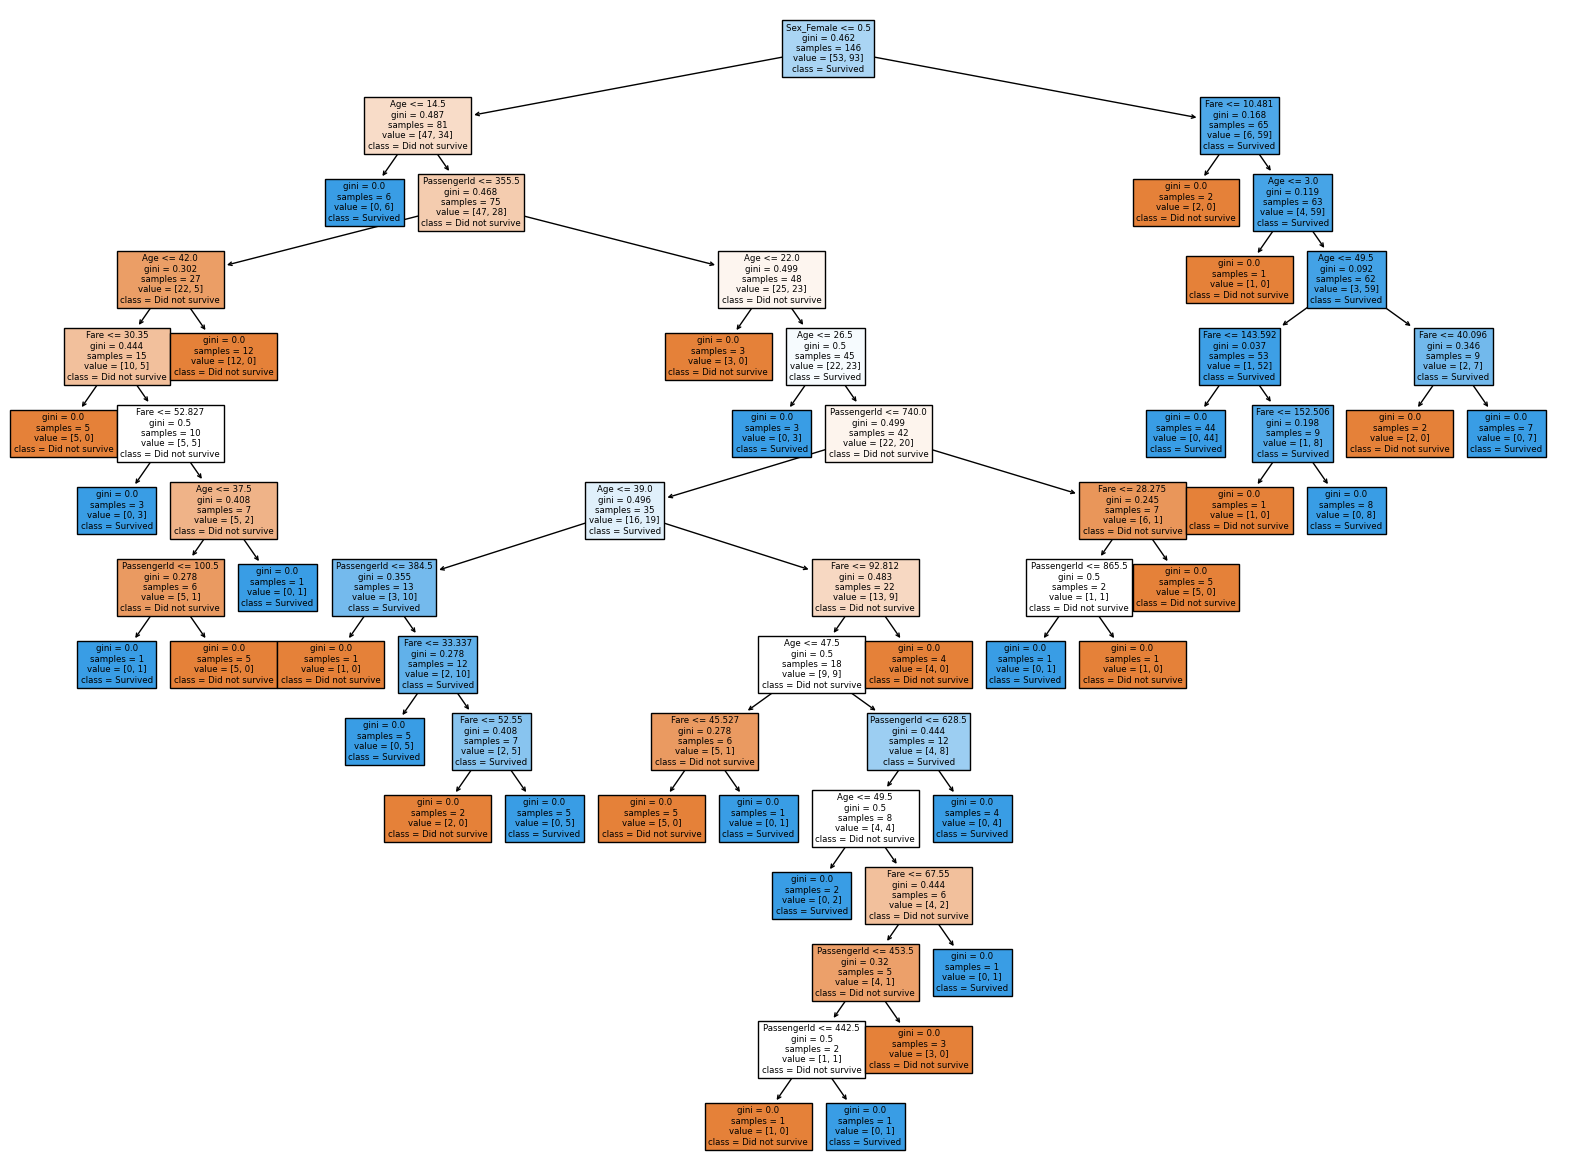

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Dibuja el árbol
plt.figure(figsize=(20, 15))
plot_tree(model, feature_names=NUMERIC_FEATURES + ['Sex_Female', 'Sex_Male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], class_names=['Did not survive', 'Survived'], filled=True)
plt.show()


# Predecir (test al azar).

In [47]:
# Valor de pasajero a predecir
passenger_index = 3

# Crear un DataFrame con los datos del pasajero a predecir
data = {
    'PassengerId': [titanic['PassengerId'].iloc[passenger_index]],
    'Pclass': [titanic['Pclass'].iloc[passenger_index]],
    'Age': [titanic['Age'].iloc[passenger_index]],
    'SibSp': [titanic['SibSp'].iloc[passenger_index]],
    'Fare': [titanic['Fare'].iloc[passenger_index]],
    'Sex_Female': [1 if titanic['Sex'].iloc[passenger_index] == 'female' else 0],
    'Sex_Male': [1 if titanic['Sex'].iloc[passenger_index] == 'male' else 0],
    'Embarked_C': [1 if titanic['Embarked'].iloc[passenger_index] == 'C' else 0],
    'Embarked_Q': [1 if titanic['Embarked'].iloc[passenger_index] == 'Q' else 0],
    'Embarked_S': [1 if titanic['Embarked'].iloc[passenger_index] == 'S' else 0]
}

# Crear un DataFrame con las mismas características que utilizaste para entrenar el modelo
features = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Fare', 'Sex_Female', 'Sex_Male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X_new = pd.DataFrame(data, columns=features)

# Realizar la predicción
prediction = model.predict(X_new)

# Determinar el estado del pasajero e imprimirlo
if prediction[0] == 1:
    print(f'El pasajero con PassengerId {passenger_index} sobrevivió.')
else:
    print(f'El pasajero con PassengerId {passenger_index} no sobrevivió.')


El pasajero con PassengerId 3 sobrevivió.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [49]:
from IPython.display import Markdown, HTML

# Valor de pasajero a predecir
passenger_index = 3

# Crear un DataFrame con los datos del pasajero a predecir
data = {
    'PassengerId': [titanic['PassengerId'].iloc[passenger_index]],
    'Pclass': [titanic['Pclass'].iloc[passenger_index]],
    'Age': [titanic['Age'].iloc[passenger_index]],
    'SibSp': [titanic['SibSp'].iloc[passenger_index]],
    'Fare': [titanic['Fare'].iloc[passenger_index]],
    'Sex_Female': [1 if titanic['Sex'].iloc[passenger_index] == 'female' else 0],
    'Sex_Male': [1 if titanic['Sex'].iloc[passenger_index] == 'male' else 0],
    'Embarked_C': [1 if titanic['Embarked'].iloc[passenger_index] == 'C' else 0],
    'Embarked_Q': [1 if titanic['Embarked'].iloc[passenger_index] == 'Q' else 0],
    'Embarked_S': [1 if titanic['Embarked'].iloc[passenger_index] == 'S' else 0]
}

# Crear un DataFrame con las mismas características que utilizaste para entrenar el modelo
features = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Fare', 'Sex_Female', 'Sex_Male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X_new = pd.DataFrame(data, columns=features)

# Realizar la predicción
prediction = model.predict(X_new)

# Formatear la respuesta para imprimir en cuadros de colores
if prediction[0] == 1:
    result = f'<div style="font-size: 20px; padding: 10px; background-color: lightgreen; color: black;"><strong>El pasajero con <span style="background-color: blue; color: white;">PassengerId {passenger_index}</span> sobrevivió.</strong></div>'
else:
    result = f'<div style="font-size: 20px; padding: 10px; background-color: red; color: white;"><strong>El pasajero con <span style="background-color: blue; color: white;">PassengerId {passenger_index}</span> no sobrevivió.</strong></div>'

display(HTML(result))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
